In [164]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import Scaler
from sklearn.preprocessing import StandardScaler

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# import colour map
import matplotlib.cm as cm

# import min/max scaler 
from sklearn.preprocessing import MinMaxScaler

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [165]:
# Import Data
detailed_transactions_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/all_transactions_data.csv')
transactions = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_transactions_df.csv')
checkings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_checkings_df.csv')
savings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_savings_df.csv')
credit = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_credit_df.csv')

## KMeans clustering on transactions using KMeans++ initialization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

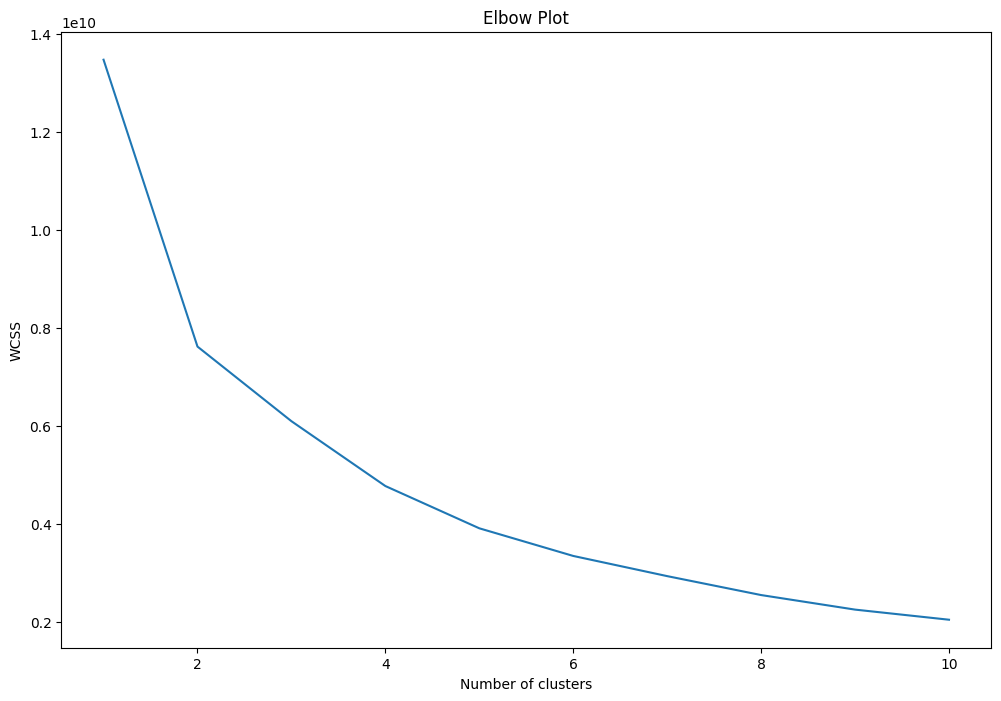

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Copy the transactions dataframe
transactions_copy = transactions.copy()

# Extract relevant columns
X = transactions_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Initialize an empty list to store the WCSS values
wcss = []

# Fit KMeans model with different number of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

transactions_copy = transactions.copy()

# Extract relevant columns
X = transactions_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Fit KMeans model with 3 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the transactions dataframe
transactions_copy['cluster_labels'] = cluster_labels

# Analyze the clusters
transactions_copy.groupby('cluster_labels').mean()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
cluster_labels,,,,,,,,,,,,,,,,,,,
0,1.362995e+06,2.496599,17.068027,12.882086,0.047619,11.405896,0.154195,1.891156,2.092971,9.555556,14.777778,6.301587,6.539683,22.537415,18.510301,63.940023,483.168934,-12.589751,51.188027
1,1.362983e+06,2.302703,22.918919,16.756757,0.016216,2.951351,0.027027,3.351351,2.681081,10.594595,20.767568,6.324324,11.037838,38.718919,13.880281,114.688378,-310.591081,-4347.076162,-4232.542973
2,1.362964e+06,1.657895,18.684211,15.684211,0.236842,11.894737,0.000000,1.052632,2.078947,12.131579,13.868421,8.315789,6.815789,24.131579,23.075109,256.892632,4328.661579,3704.779211,3961.456316


## Plot clusters with PCA

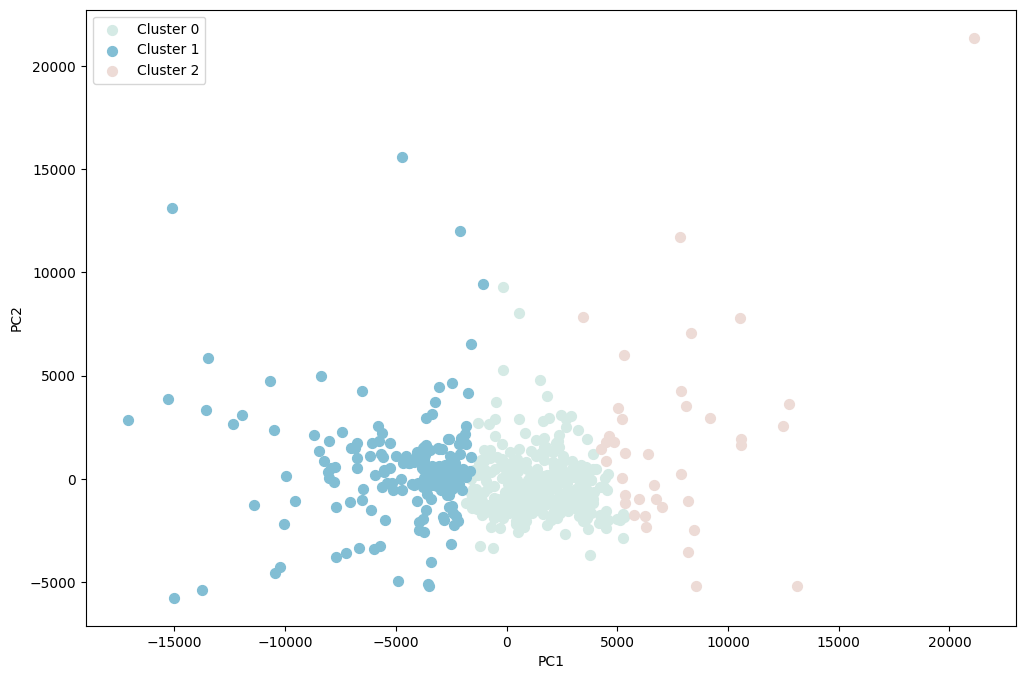

In [202]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant columns for PCA
X = transactions[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the transformed data with cluster labels
colors = ['#D5EAE5', '#82BED4', '#EDDBD6']
for i in range(3):
    plt.scatter(X_pca[cluster_labels==i, 0], X_pca[cluster_labels==i, 1], s=50, c=colors[i], label='Cluster '+str(i))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('BH_PCA_cluster_transactions_df.png')
plt.show() 

In [169]:
transactions_copy.head(100)

,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt,cluster_labels
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99,2
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39,2
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52,2
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36,2
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1362622,2,31,32,1,0,0,1,1,16,20,7,10,55,17.784807,444.15,13887.73,1894.47,2338.08,0
96,1362623,0,0,8,0,11,0,0,7,12,11,0,5,14,25.994194,2.12,156.32,-261.61,-259.49,2
97,1362624,9,28,4,0,0,0,0,1,12,1,12,3,5,20.630833,73.04,-371.99,-107.84,-34.80,2
98,1362625,0,28,4,0,3,4,1,0,3,3,12,2,3,14.363636,79.20,-202.11,2499.06,2577.18,2


In [170]:
mean_data = transactions_copy.groupby('cluster_labels').mean()
mean_data = mean_data.reset_index()
mean_data

,cluster_labels,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
0,0,1.362997e+06,1.978723,18.234043,14.042553,0.212766,10.893617,0.000000,1.000000,1.936170,11.446809,12.765957,8.340426,6.148936,21.808511,23.721481,226.705106,3621.081915,3481.310638,3707.751489
1,1,1.362984e+06,2.327869,23.169399,16.732240,0.016393,2.890710,0.027322,3.371585,2.699454,10.628415,20.786885,6.393443,11.054645,38.726776,13.951805,115.776120,-321.982186,-4370.377377,-4254.758142
2,2,1.362992e+06,2.467742,17.004608,13.029954,0.046083,11.490783,0.156682,1.912442,2.103687,9.566820,14.935484,6.228111,6.619816,22.827189,18.294145,62.983065,481.196267,-75.626959,-12.799009


## Plot Radar Chart

In [171]:
import plotly.graph_objects as go
import plotly.express as px

# Define the categories and their labels for the radar chart
categories = ['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']

fig = go.Figure()

for i in mean_data.index:
    df = mean_data.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[mean_data[categories].values.min(), mean_data[categories].values.max()]
    )),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)

fig.show()

## Hierarchal Clustering on transactions_df

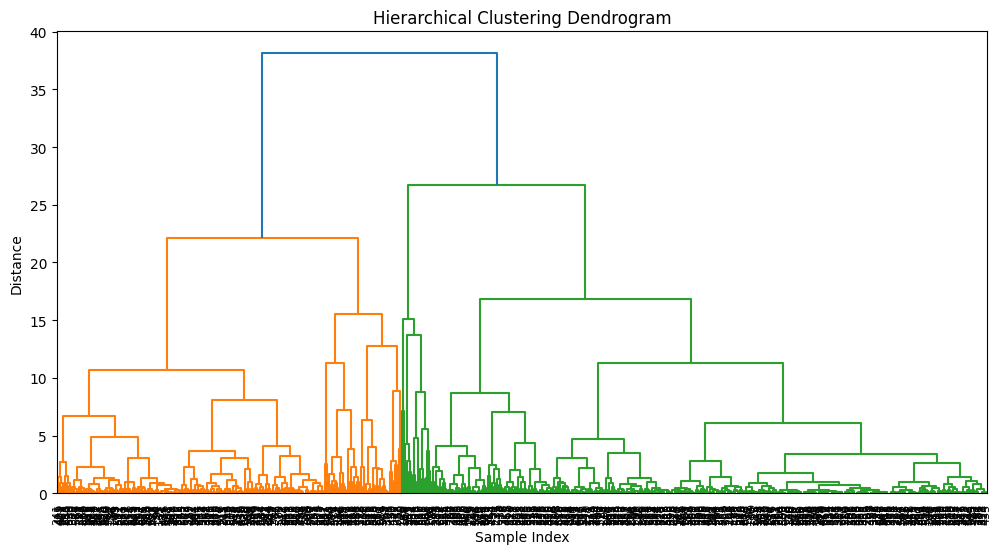

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the variables for clustering
X = transactions.iloc[:, 15:19].values

# Normalize the variables to have zero mean and unit variance
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform hierarchical clustering using Ward's method and 3 clusters
Z = linkage(X, method='ward')
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Extract the variables for clustering
X = transactions.iloc[:, 15:19].values

# Normalize the variables to have zero mean and unit variance
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform hierarchical clustering using Ward's method and 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X)

# Create a copy of the transactions table
transactions_h_clustered = transactions.copy()

# Add the cluster labels as a new column in the copy of the transactions table
transactions_h_clustered['Cluster'] = clusters


In [174]:
h_mean_data = transactions_h_clustered.groupby('Cluster').mean()
h_mean_data = h_mean_data.reset_index()
h_mean_data

,Cluster,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
0,0,1.362996e+06,2.504065,22.203252,16.520325,0.012195,4.439024,0.044715,3.418699,2.833333,11.065041,20.186992,6.760163,10.378049,36.808943,15.790697,106.316341,-200.011098,-3554.035000,-3447.882561
1,1,1.362989e+06,2.347607,16.508816,12.302267,0.060453,11.717884,0.156171,1.594458,1.929471,9.163728,13.984887,6.181360,6.093199,20.710327,18.504447,62.469093,486.723728,401.925718,464.231587
2,2,1.362946e+06,2.000000,21.952381,20.428571,0.285714,13.523810,0.000000,0.952381,1.666667,13.095238,17.523810,7.047619,10.142857,35.333333,17.951041,391.560476,8384.795238,2178.501905,2569.903810


In [175]:
import plotly.graph_objects as go
import plotly.express as px

# Define the categories and their labels for the radar chart
categories = transactions.columns[15:19].tolist()

fig = go.Figure()

for i in h_mean_data.index:
    df = h_mean_data.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[h_mean_data[categories].values.min(), h_mean_data[categories].values.max()]
    )),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)

fig.show()


## KMeans clustering on merged_savings_df using KMeans++ initialization

In [176]:
null_mask = savings[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']].isnull().any(axis=1)
null_rows = savings[null_mask]
null_rows

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,average_transaction_time,tran_amt,principal_amt,interest_amt,new_balance,avg_days_btwn_trans
252,1362890,13628903,100,BS,N,1990-05-23,1995-01-18,104.78,104.78,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
savings = savings.drop(index=252)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

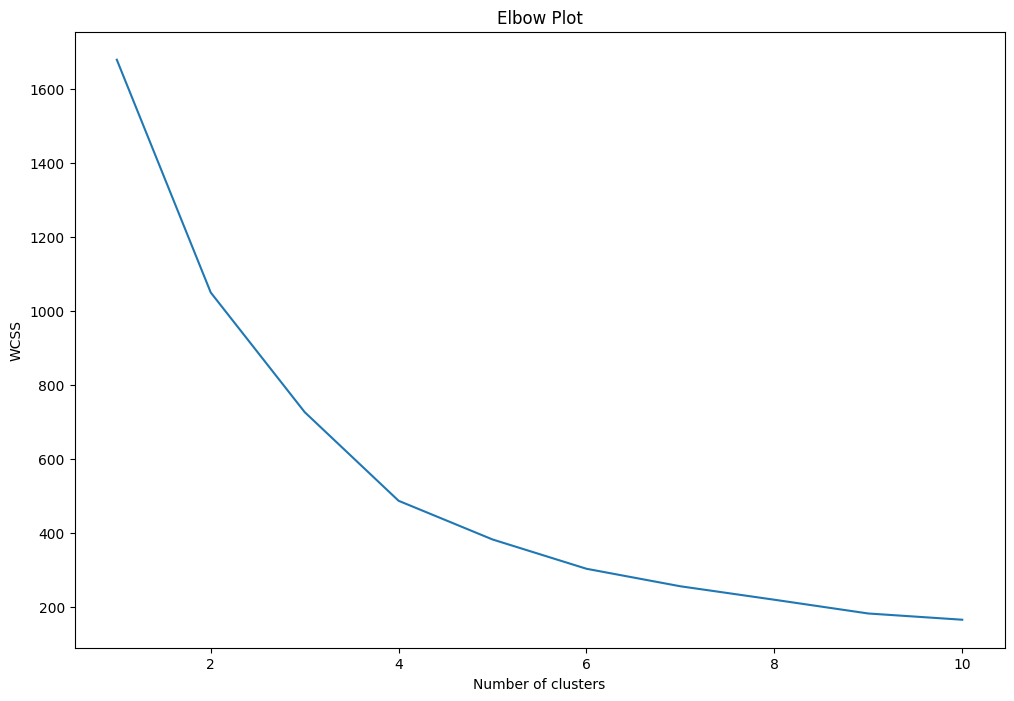

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Copy the savings dataframe
savings_copy = savings.copy()

# Extract relevant columns
X = savings_copy.iloc[:, 10:14]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an empty list to store the WCSS values
wcss = []

# Fit KMeans model with different number of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



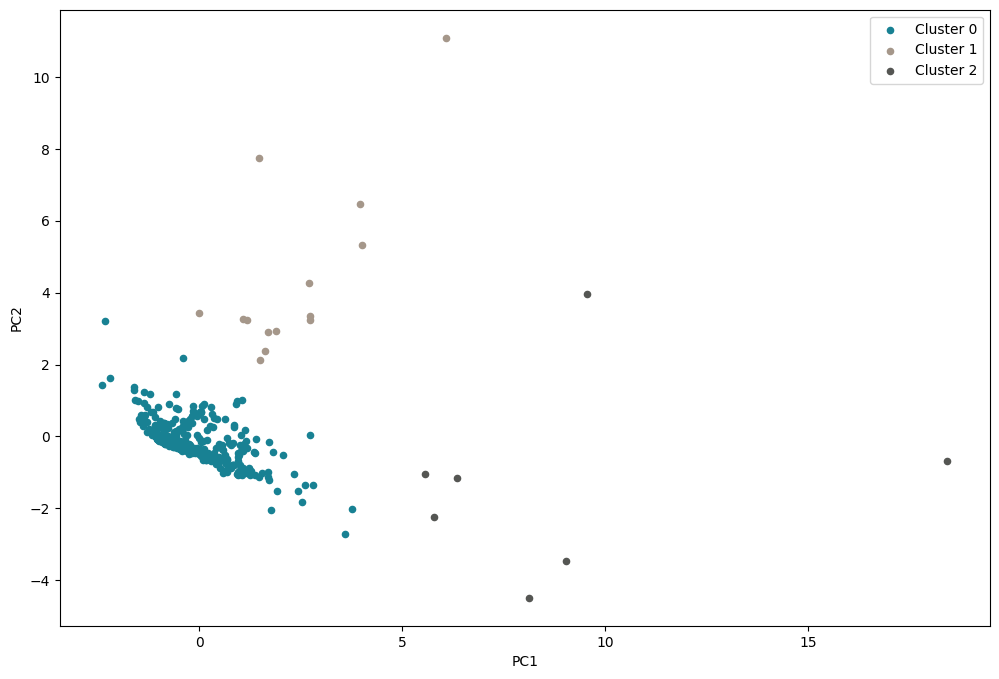

In [179]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant columns for clustering
X = savings_copy.iloc[:, 10:14]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means with 3 clusters
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X_scaled)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the transformed data with cluster labels
colors = ['#188193', '#a5978a', '#555653']
for i in range(3):
    cluster_i = (cluster_labels == i)[:X_pca.shape[0]]
    plt.scatter(X_pca[cluster_i, 0], X_pca[cluster_i, 1], s=20, c=colors[i], label='Cluster '+str(i))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [181]:
from scipy import stats

# Calculate the Z-scores of each feature in the financial data
numeric_columns = savings_copy.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(savings_copy[numeric_columns]))

# Detect the outliers based on the Z-scores
outliers = (z_scores > 3).any(axis=1)

# View the outlier rows
outlier_rows

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,average_transaction_time,tran_amt,principal_amt,interest_amt,new_balance,avg_days_btwn_trans,cluster_labels
38,1362727,13627273,100,NaN,NaN,NaN,NaN,8996.64,9132.52,NaN,135.88,0.00,135.88,9132.52,30.363636,2
52,1363337,13633373,100,NaN,NaN,NaN,NaN,531.48,7766.05,NaN,7234.57,7138.87,95.70,7766.05,9.333333,2
56,1362725,13627253,500,NaN,NaN,NaN,NaN,17303.42,16095.50,NaN,-1207.92,-1708.49,500.57,16095.50,15.904762,2
70,1362622,13626223,500,NaN,NaN,NaN,NaN,9223.34,13404.16,NaN,4180.82,3824.67,356.15,13404.16,11.800000,2
74,1362887,13628873,100,NaN,NaN,NaN,NaN,591.90,4262.93,NaN,3671.03,3671.03,0.00,3210.76,0.521739,0
79,1362969,13629693,100,NaN,NaN,NaN,NaN,1063.49,5792.74,NaN,4729.25,4668.76,60.49,5792.74,7.276596,2
146,1363083,13630833,500,NaN,NaN,NaN,NaN,5830.18,6325.98,NaN,496.25,311.11,185.14,6325.98,11.133333,0
188,1363018,13630183,500,NaN,NaN,NaN,NaN,11793.93,9387.66,NaN,-2405.19,-2693.96,288.77,9387.66,7.723404,2
211,1363262,13632623,500,NaN,NaN,NaN,NaN,1919.95,6027.35,NaN,4107.67,4004.52,103.15,6027.35,10.843750,2
272,1362766,13627663,100,NaN,NaN,NaN,NaN,11352.93,22432.78,NaN,11079.94,10761.77,318.17,22432.78,6.703704,2


Removing 19 outliers as noise can improve the accuracy and reliability of financial analysis by reducing the influence of noise and increasing the signal-to-noise ratio in the data.

In [182]:
savings_copy = savings_copy[~outliers]

In [183]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

savings_copy = savings.copy()

# Select the columns to use for clustering
X = savings_copy.iloc[:, 10:14]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans model with 3 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the savings dataframe
savings_copy['cluster_labels'] = cluster_labels

# Convert all columns to numeric values
savings_copy = savings_copy.apply(pd.to_numeric, errors='coerce')

# Select columns with numeric values
numeric_columns = savings_copy.select_dtypes(include=[np.number]).columns.tolist()

# Perform clustering on numeric columns
cluster_means = savings_copy.groupby('cluster_labels').mean()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [184]:
# Group savings_copy by cluster_labels and compute mean for each cluster
savings_clustered = savings_copy.groupby('cluster_labels').mean()

# Reset index to turn 'cluster_labels' into a regular column
savings_clustered = savings_clustered.reset_index()

# Rename column names to match h_mean_data
savings_clustered = savings_clustered.rename(columns={'cluster_labels': 'Cluster', 'starting_balance': 'Starting_Balance', 'ending_balance': 'Ending_Balance', 'average_transaction_time': 'Avg_Transaction_Time', 'tran_amt': 'Transaction_Amount', 'principal_amt': 'Principal_Amount', 'interest_amt': 'Interest_Amount', 'new_balance': 'New_Balance', 'avg_days_btwn_trans': 'Avg_Days_Between_Trans'})

# Print the resulting dataframe
savings_clustered

,Cluster,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,Starting_Balance,Ending_Balance,Avg_Transaction_Time,Transaction_Amount,Principal_Amount,Interest_Amount,New_Balance,Avg_Days_Between_Trans
0,0,1.362975e+06,1.362976e+07,183.044983,NaN,NaN,NaN,NaN,443.139377,458.059273,NaN,15.135709,5.897128,9.238581,460.303460,16.569892
1,1,1.363025e+06,1.363025e+07,207.563025,NaN,NaN,NaN,NaN,1305.823613,2296.540336,NaN,991.098655,957.188151,33.910504,2271.486975,12.661519
2,2,1.362914e+06,1.362914e+07,333.333333,NaN,NaN,NaN,NaN,7034.549167,10322.613333,NaN,3288.304167,3073.415000,214.889167,10322.613333,13.118700


In [185]:
# Define the categories and their labels for the radar chart
categories = savings_copy.columns[10:14].tolist()

# Plot the radar chart
fig = go.Figure()

for i in cluster_means.index:
    df = cluster_means.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[cluster_means[categories].values.min(), cluster_means[categories].values.max()]
    )),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)

fig.show()

In [186]:
# Create a dictionary to store the correlation coefficients for each variable in each cluster
r_values = {}
for i in cluster_means.index:
    r_values[f"Cluster {i}"] = {}
    for var in categories:
        r = cluster_means.loc[i, var]
        r_values[f"Cluster {i}"][var] = r

# Create a pandas dataframe to display the correlation coefficients in a table
savings_rvalue = pd.DataFrame(r_values).T
savings_rvalue = df_r.applymap(lambda x: round(x, 2))
savings_rvalue.index.name = "Cluster"
savings_rvalue.columns.name = "Variable"

# Display the dataframe
savings_rvalue

Variable,tran_amt,principal_amt,interest_amt,new_balance
Cluster,,,,
Cluster 0,995.3,960.79,34.51,2303.78
Cluster 1,23.5,14.24,9.25,466.08
Cluster 2,3288.3,3073.42,214.89,10322.61


## KMeans clustering on merged_credit_df using KMeans++ initialization

In [187]:
# Dropped rows where all the credit info needed below was null
null_mask = credit[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']].isnull().any(axis=1)
null_rows = credit[null_mask]
credit = credit.drop(index=[125,165,246,284,345,358,395,396,409,412,429])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

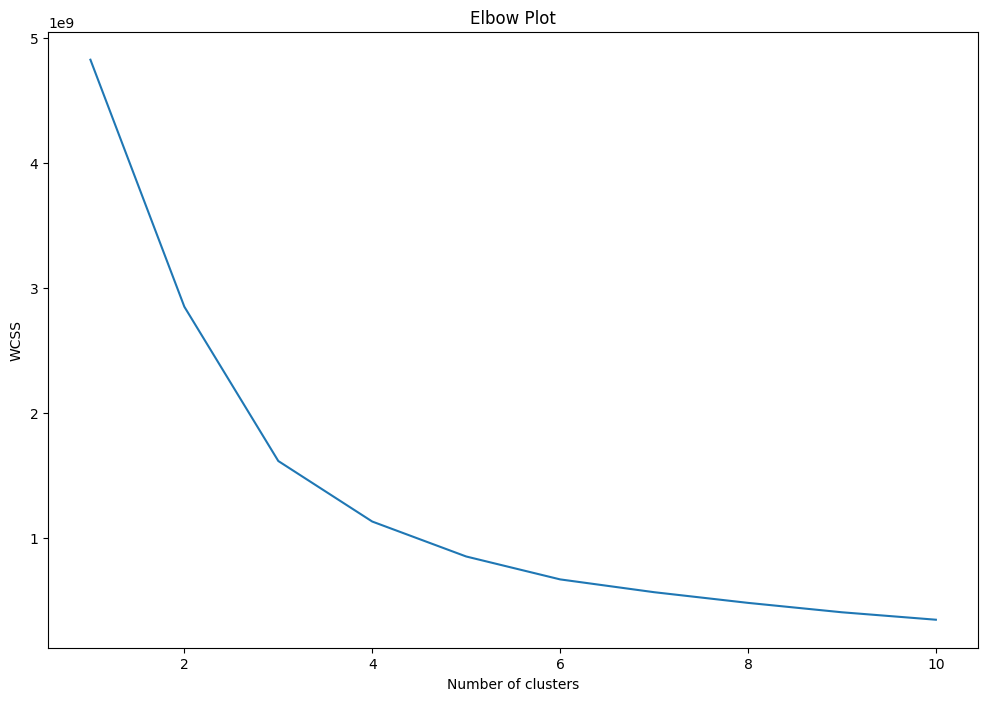

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Copy the savings dataframe
credit_copy = credit.copy()

# Extract relevant columns
X = credit_copy[['tran_amt', 'principal_amt', 'interest_amt', 'new_balance']]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an empty list to store the WCSS values
wcss = []

# Fit KMeans model with different number of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [189]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant columns for PCA
X = credit.iloc[:, 11:15]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the transformed data with cluster labels
colors = ['#188193', '#a5978a', '#555653']
for i in range(3):
    cluster_i = (cluster_labels == i)[:X_pca.shape[0]]
    plt.scatter(X_pca[cluster_i, 0], X_pca[cluster_i, 1], s=20, c=colors[i], label='Cluster '+str(i))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 457 but corresponding boolean dimension is 420

In [190]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans

credit_copy = credit.copy()

# Select the columns to use for clustering
X = credit_copy.iloc[:, 11:15]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans model with 3 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the savings dataframe
credit_copy['cluster_labels'] = cluster_labels

# Convert all columns to numeric values
credit_copy = credit_copy.apply(pd.to_numeric, errors='coerce')

# Select columns with numeric values
numeric_columns = credit_copy.select_dtypes(include=[np.number]).columns.tolist()

# Perform clustering on numeric columns
cluster_means = credit_copy.groupby('cluster_labels').mean()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [191]:
# Group savings_copy by cluster_labels and compute mean for each cluster
credit_clustered = credit_copy.groupby('cluster_labels').mean()

# Reset index to turn 'cluster_labels' into a regular column
credit_clustered = credit_clustered.reset_index()

# Rename column names to match h_mean_data
credit_clustered = credit_clustered.rename(columns={'cluster_labels': 'Cluster', 'starting_balance': 'Starting_Balance', 'ending_balance': 'Ending_Balance', 'average_transaction_time': 'Avg_Transaction_Time', 'tran_amt': 'Transaction_Amount', 'principal_amt': 'Principal_Amount', 'interest_amt': 'Interest_Amount', 'new_balance': 'New_Balance', 'avg_days_btwn_trans': 'Avg_Days_Between_Trans'})

# Print the resulting dataframe
credit_clustered

,Cluster,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,Starting_Balance,Ending_Balance,CA,CG,FA,IQ,PM,Transaction_Amount,Principal_Amount,Interest_Amount,New_Balance,Avg_Days_Between_Trans
0,0,1.362951e+06,4.561143e+15,4469.620253,0.379747,0.531646,NaN,NaN,3566.020633,503.317342,3.000000,20.683544,0.367089,3.189873,9.759494,3253.262532,3067.276203,-186.231266,-516.081139,11.168915
1,1,1.362986e+06,4.561143e+15,2069.405099,0.334278,0.977337,NaN,NaN,690.831700,1124.823683,3.631728,28.566572,0.011331,4.158640,9.657224,-349.776516,-430.507620,-80.978669,-1118.786516,7.877487
2,2,1.363085e+06,4.561143e+15,5152.000000,0.000000,1.000000,NaN,NaN,4.212000,4708.066400,2.680000,30.120000,0.000000,3.280000,3.400000,-4645.018000,-4694.755200,-49.805600,-4681.545600,2.763516


In [192]:
# Define the categories and their labels for the radar chart
categories = credit.columns[16:20].tolist()

# Plot the radar chart
fig = go.Figure()

for i in cluster_means.index:
    df = cluster_means.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[cluster_means[categories].values.min(), cluster_means[categories].values.max()]
    ),
    angularaxis=dict(
      categoryarray=categories,
      categoryorder='array'
    )
  ),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)

fig.show()


In [193]:
# Define the categories and their labels for the radar chart
categories = credit.columns[16:20].tolist()

# Create a dictionary to store the correlation coefficients for each variable in each cluster
r_values = {}
for i in cluster_means.index:
    r_values[f"Cluster {i}"] = {}
    for var in categories:
        r = cluster_means.loc[i, var]
        r_values[f"Cluster {i}"][var] = r

# Create a pandas dataframe to display the correlation coefficients in a table
df_r = pd.DataFrame(r_values).T
df_r = df_r.applymap(lambda x: round(x, 2))
df_r.index.name = "Cluster"
df_r.columns.name = "Variable"

# Display the dataframe
df_r

Variable   interest_amt  new_balance  avg_days_btwn_trans
Cluster                                                  
Cluster 0       -186.23      -516.08                11.17
Cluster 1        -80.98     -1118.79                 7.88
Cluster 2        -49.81     -4681.55                 2.76
